In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',', index_col = 1)
panelist_data_df = panelist_data_df[panelist_data_df["panelist"]==1]
panelist_data_df = panelist_data_df.drop(columns=["panelist", "date"])

show distribution of each flavor in the panelist data

In [29]:
panelist_data_df['floral']

samplekey
000656    50
000657    30
000658    30
000661    60
000662    40
          ..
000926    50
000927    30
000929    20
000930    20
000933    40
Name: floral, Length: 319, dtype: int64

In [30]:
flavors = ['floral','fruit','wood','complexity','sweet','peat','dried_fruits','aftertaste']

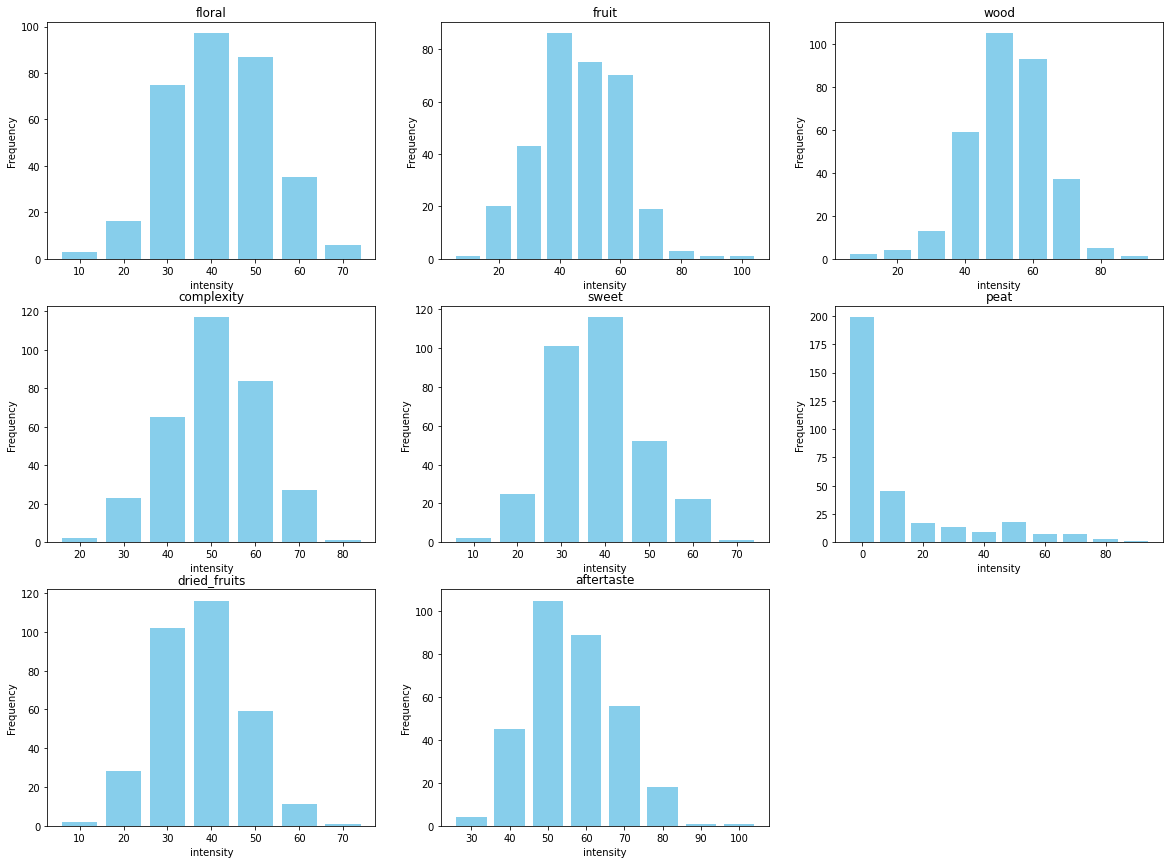

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
i = 0
for flavor in flavors:
    i+=1
    counts = panelist_data_df[flavor].value_counts()

    plt.subplot(4,3,i)
    plt.bar(counts.index, counts.values, color='skyblue',width=8)
    plt.xlabel('intensity')
    plt.ylabel('Frequency')
    plt.title(flavor)
plt.show()


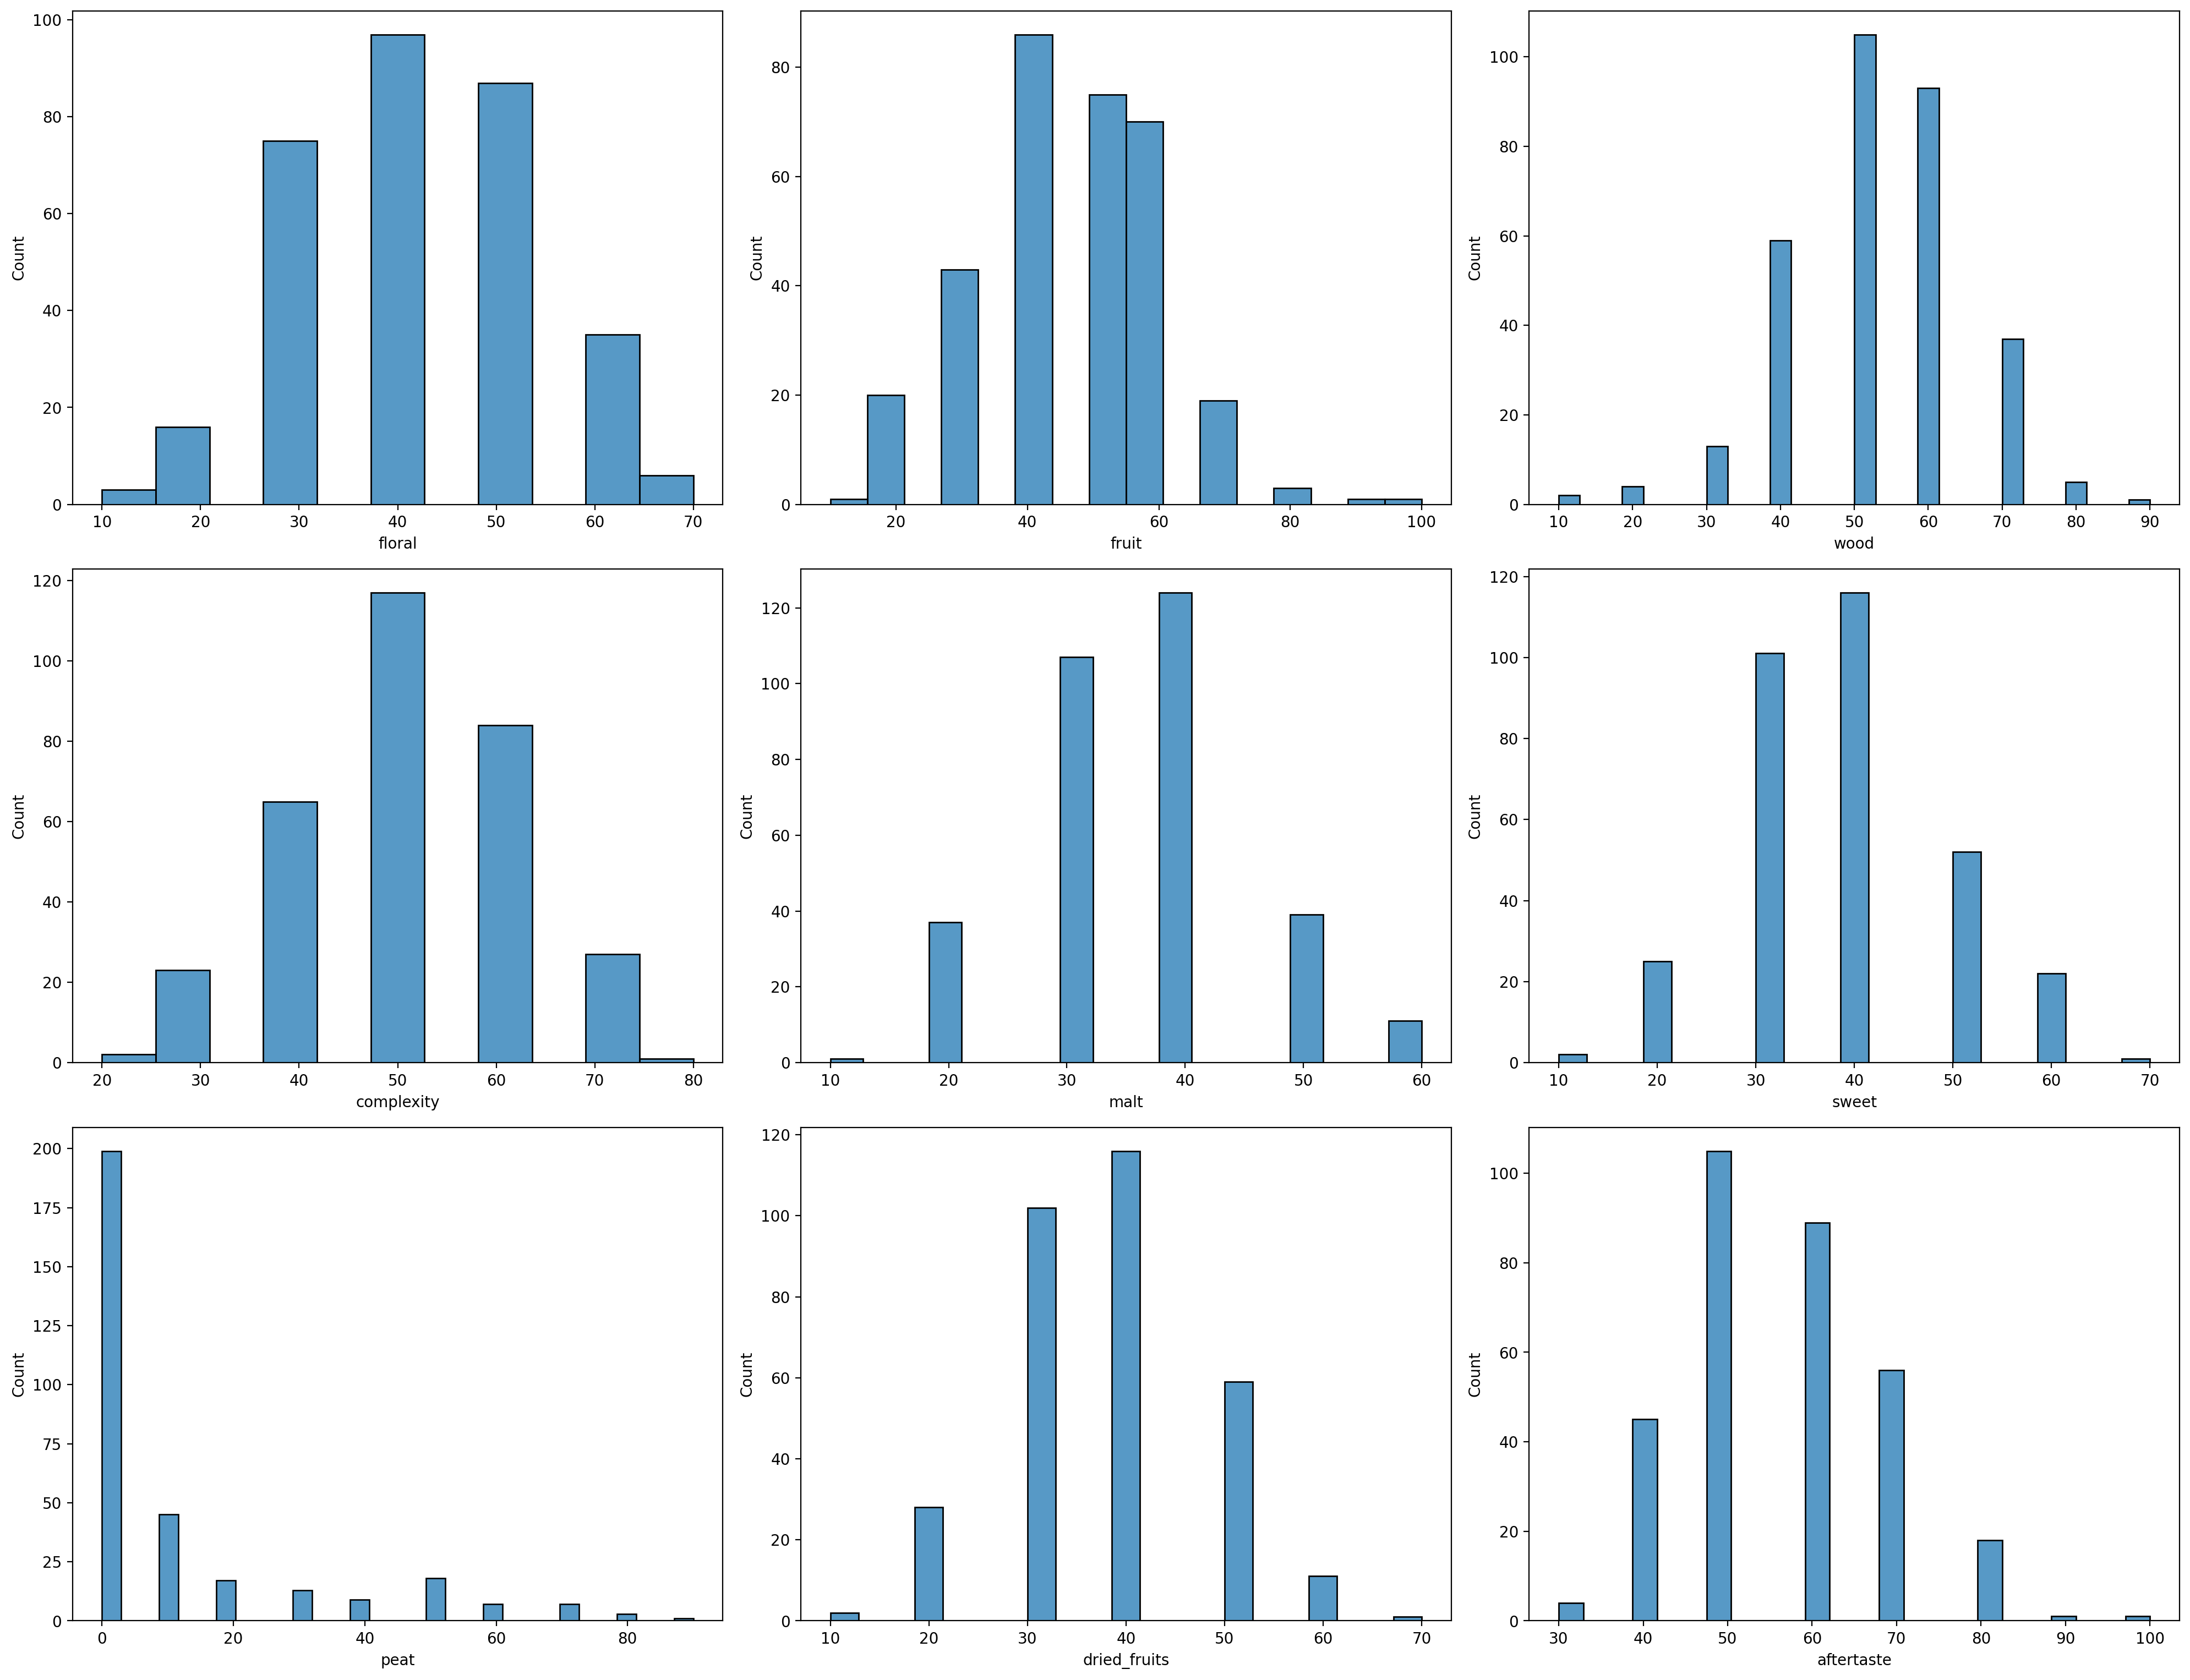

In [32]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.histplot(x='floral', data=panelist_data_df)

plt.subplot(4, 3, 2)
sns.histplot(x='fruit', data=panelist_data_df)

plt.subplot(4, 3, 3)
sns.histplot(x='wood', data=panelist_data_df)

plt.subplot(4, 3, 4)
sns.histplot(x='complexity', data=panelist_data_df)

plt.subplot(4, 3, 5)
sns.histplot(x='malt', data=panelist_data_df)

plt.subplot(4, 3, 6)
sns.histplot(x='sweet', data=panelist_data_df)

plt.subplot(4, 3, 7)
sns.histplot(x='peat', data=panelist_data_df)

plt.subplot(4, 3, 8)
sns.histplot(x='dried_fruits', data=panelist_data_df)

plt.subplot(4, 3, 9)
sns.histplot(x='aftertaste', data=panelist_data_df)

plt.tight_layout()
plt.show()


### 1. Looking at one Flavor only

#### filter only sweet samples

In [33]:
# ms data
data = pd.read_csv('data/cas_intensities.csv', delimiter=',', index_col = 0)
# only use first repliat
data = data[data["replicate"]==1]
ms_data = data.drop(columns=["replicate"])

ms_data_comp = df of ms data containing only comparable samples


panelist_data_comp = df of panelist data containing only comparable samples

In [34]:
# get only comparable samplekeys
valid_indexes = [index for index in panelist_data_df.index if index in ms_data.index]
ms_data_comp = ms_data.loc[valid_indexes]
panelist_data_comp = panelist_data_df.loc[valid_indexes]

In [35]:
# look which smaples are sweet, average sweet and not sweet
sweet_sample_ids = panelist_data_comp[panelist_data_comp["sweet"]>= 60].index
not_sweet_sample_ids = panelist_data_comp[panelist_data_comp["sweet"]<= 20].index
average_sweet_sample_ids = panelist_data_comp[(panelist_data_comp["sweet"] >= 30) & (panelist_data_comp["sweet"] <= 50)]["sweet"].index

In [36]:
# find CAS number to each molecule
CAS_to_mol = pd.read_table("data/CAS_mol_OD.csv", delimiter=',',  names= ["CAS","intensity", "odor"])
CAS_to_mol=CAS_to_mol.drop(columns=["intensity","odor"])
CAS_to_mol= CAS_to_mol.drop_duplicates()
CAS_to_mol

,CAS
(-)-carvone,6485-40-1
(-)-cis-rose oxide,3033-23-6
(-)-cubenol,21284-22-0
(-)-nootkatone,38427-78-0
(-)-β-bisabolene,495-61-4
...,...
δ-dodecalactone,713-95-1
δ-elemene,20307-84-0
δ-muurolene,120021-96-7
δ-terpinene,586-62-9


sweet_descriptors =  all molecules that where labeled as sweet in flavornet

In [37]:
# all molecules that where labeled as sweet in flavornet
sweet_descriptors = ["benzyl alcohol","ethyl phenylacetate","tridecanal","nerol","methyl hexanoate","linalyl isovalerate","undecanaldehyde","caryophyllene oxide","linalyl acetate","safranal","uncineol","phenylethanal","p-anisaldehyde","eudesmol","ethylmethyl pyrazine","citronellyl butyrate","4-methyl-3-penten-2-one","nonyl acetate","10-epi-γ-eudesmol","β-bisabolol","(Z)-6-dodecene-γ-lactone","β-farnesene","2-dodecenal","γ-dodecalactone","epoxy-β-ionone","2-undecenal","styrene glycol","methyl furaneol","(-)-cis-rose oxide","(E)-β-ocimene","dimethylmethoxyfuranone","1,8-cineole","ethylbenzaldehyde","2-pentylthiophene","α-farnesene","methionol","7-methoxycoumarin","(Z)-3-hexenyl-2-methylbutanoate","o-aminoacetophenone","viridiflorol","isopiperitone","β-sinensal","ethyl vanillate","methyl butanoate","p-methoxystyrene","ethanol","6-Methoxyeugenol","4-hexanolide","δ-dodecalactone","sesquiphellandrene","diethyl malate","linalyl butyrate","guaiacol","coumarin","methyl benzoate","isopropyl benzoate","safrole","durene","γ-butyrolactone","ethyl isobutyrate","furfural"]

In [38]:
# find cas numbers for these molecules
sweet_descriptors_CAS = [CAS_to_mol.loc[index]["CAS"]for index in sweet_descriptors if index in CAS_to_mol.index ]
sweet_descriptors_CAS

['100-51-6',
 '101-97-3',
 '10486-19-8',
 '106-25-2',
 '106-70-7',
 '1118-27-0',
 '112-44-7',
 '1139-30-6',
 '115-95-7',
 '116-26-7',
 '1209-71-8',
 '122-78-1',
 '123-11-5',
 '123123-38-6',
 '13360-64-0',
 '141-16-2',
 '141-79-7',
 '143-13-5',
 '15051-81-7',
 '15352-77-9',
 '18679-18-0',
 '18794-84-8',
 '20407-84-5',
 '07.05.2305',
 '23267-57-4',
 '2463-77-6',
 '25779-13-9',
 '27538-09-6',
 '3033-23-6',
 '3779-61-1',
 '4077-47-8',
 '470-82-6',
 '4748-78-1',
 '4861-58-9',
 '502-61-4',
 '505-10-2',
 '531-59-9',
 '53398-85-9',
 '551-93-9',
 '552-02-3',
 '58615-39-7',
 '60066-88-8',
 '617-05-0',
 '623-42-7',
 '637-69-4',
 '64-17-5',
 '6627-88-9',
 '695-06-7',
 '713-95-1',
 '73744-93-1',
 '03.12.7554',
 '78-36-4',
 '90-05-1',
 '91-64-5',
 '93-58-3',
 '939-48-0',
 '94-59-7',
 '95-93-2',
 '96-48-0',
 '97-62-1',
 '98-01-1']

In [39]:
sweet_ms= ms_data_comp.loc[sweet_sample_ids]
not_sweet_ms = ms_data_comp.loc[not_sweet_sample_ids]
average_sweet_ms = ms_data_comp.loc[average_sweet_sample_ids]

In [40]:
# create dataframe for plotting 
violin_df = pd.DataFrame.copy(ms_data_comp)
violin_df["category"]= list((pd.Series(violin_df.index)).apply((lambda x: 'sweet' if x in sweet_sample_ids else ('not sweet' if x in not_sweet_sample_ids else 'average'))))

violin_df = containing all CAS numbers and comparable samples plus their category meaning if the sample was categorized sweet, not sweet or average sweet regarding the panelist data

In [41]:
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,483-76-1,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,2.825842e+08,2.133618e+09,1.376122e+08,1.129117e+08,1.241942e+08,1.241942e+08,7.594208e+08,2.825842e+08,2.825842e+08,2.133618e+09,...,1.241942e+08,1.376122e+08,5.743096e+08,5.743096e+08,1.934397e+08,1.241942e+08,1.241942e+08,3.090106e+08,3.111124e+08,average
000657,2.490753e+08,2.387300e+09,1.174299e+08,1.045745e+08,1.101815e+08,1.101815e+08,7.396865e+08,2.490753e+08,2.490753e+08,2.387300e+09,...,1.101815e+08,1.174299e+08,5.553109e+08,5.553109e+08,1.719868e+08,1.101815e+08,1.101815e+08,2.527582e+08,2.963368e+08,average
000658,3.063394e+08,2.208002e+09,2.074207e+08,2.021848e+08,2.078365e+08,2.078365e+08,1.000881e+09,3.063394e+08,3.063394e+08,2.208002e+09,...,2.078365e+08,2.074207e+08,6.027752e+08,6.027752e+08,2.912135e+08,2.078365e+08,2.078365e+08,3.783629e+08,3.502243e+08,average
000838,3.004512e+08,1.648801e+09,3.530315e+08,2.960716e+08,3.052143e+08,3.052143e+08,5.457252e+08,3.004512e+08,3.004512e+08,1.648801e+09,...,3.052143e+08,3.530315e+08,2.109654e+08,2.109654e+08,2.575301e+08,3.052143e+08,3.052143e+08,4.299386e+08,3.679643e+08,average
000839,2.712269e+08,1.642697e+09,2.395558e+08,1.728214e+08,1.322088e+08,1.322088e+08,3.473576e+08,2.712269e+08,2.712269e+08,1.642697e+09,...,1.322088e+08,2.395558e+08,1.579338e+08,1.579338e+08,1.556085e+08,1.322088e+08,1.322088e+08,1.548222e+08,2.289899e+08,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.855528e+08,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08,average
000926,2.098708e+08,1.160679e+09,1.302705e+08,1.397330e+08,1.562665e+08,1.562665e+08,6.194031e+08,2.098708e+08,2.098708e+08,1.160679e+09,...,1.562665e+08,1.302705e+08,4.688051e+08,4.688051e+08,2.029630e+08,1.562665e+08,1.562665e+08,2.697350e+08,2.569535e+08,average
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,1.932470e+08,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08,average


### 1. over all samples

In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler


In [43]:
def normalize_flavorprofile(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data).reshape(-1, 1))
    return scaled_data

In [87]:
violin_df['category_int'] = pd.DataFrame.copy(violin_df['category'])
violin_df['category_int'] = violin_df['category_int'].replace({'sweet': 1, 'average': 0, 'not sweet': -1})
violin_df

,6485-40-1,3033-23-6,21284-22-0,38427-78-0,495-61-4,29873-99-2,6909-30-4,99-49-0,2244-16-8,876-17-5,...,36564-42-8,705-86-2,2825-91-4,713-95-1,20307-84-0,120021-96-7,586-62-9,710-04-3,category,category_int
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,2.825842e+08,2.133618e+09,1.376122e+08,1.129117e+08,1.241942e+08,1.241942e+08,7.594208e+08,2.825842e+08,2.825842e+08,2.133618e+09,...,1.376122e+08,5.743096e+08,5.743096e+08,1.934397e+08,1.241942e+08,1.241942e+08,3.090106e+08,3.111124e+08,average,0
000657,2.490753e+08,2.387300e+09,1.174299e+08,1.045745e+08,1.101815e+08,1.101815e+08,7.396865e+08,2.490753e+08,2.490753e+08,2.387300e+09,...,1.174299e+08,5.553109e+08,5.553109e+08,1.719868e+08,1.101815e+08,1.101815e+08,2.527582e+08,2.963368e+08,average,0
000658,3.063394e+08,2.208002e+09,2.074207e+08,2.021848e+08,2.078365e+08,2.078365e+08,1.000881e+09,3.063394e+08,3.063394e+08,2.208002e+09,...,2.074207e+08,6.027752e+08,6.027752e+08,2.912135e+08,2.078365e+08,2.078365e+08,3.783629e+08,3.502243e+08,average,0
000838,3.004512e+08,1.648801e+09,3.530315e+08,2.960716e+08,3.052143e+08,3.052143e+08,5.457252e+08,3.004512e+08,3.004512e+08,1.648801e+09,...,3.530315e+08,2.109654e+08,2.109654e+08,2.575301e+08,3.052143e+08,3.052143e+08,4.299386e+08,3.679643e+08,average,0
000839,2.712269e+08,1.642697e+09,2.395558e+08,1.728214e+08,1.322088e+08,1.322088e+08,3.473576e+08,2.712269e+08,2.712269e+08,1.642697e+09,...,2.395558e+08,1.579338e+08,1.579338e+08,1.556085e+08,1.322088e+08,1.322088e+08,1.548222e+08,2.289899e+08,average,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.517116e+08,1.068380e+09,1.090820e+08,1.262307e+08,1.855528e+08,1.855528e+08,6.077461e+08,1.517116e+08,1.517116e+08,1.068380e+09,...,1.090820e+08,4.520255e+08,4.520255e+08,2.344530e+08,1.855528e+08,1.855528e+08,1.823817e+08,2.454637e+08,average,0
000926,2.098708e+08,1.160679e+09,1.302705e+08,1.397330e+08,1.562665e+08,1.562665e+08,6.194031e+08,2.098708e+08,2.098708e+08,1.160679e+09,...,1.302705e+08,4.688051e+08,4.688051e+08,2.029630e+08,1.562665e+08,1.562665e+08,2.697350e+08,2.569535e+08,average,0
000927,1.688820e+08,1.102763e+09,1.523761e+08,1.616408e+08,1.932470e+08,1.932470e+08,7.387225e+08,1.688820e+08,1.688820e+08,1.102763e+09,...,1.523761e+08,4.690569e+08,4.690569e+08,2.387369e+08,1.932470e+08,1.932470e+08,2.299686e+08,2.549133e+08,average,0


In [78]:
flavor_true = violin_df[violin_df["category_int"] == 1].index
flavor_false = violin_df[violin_df["category_int"] == -1].index
flavor_true_mean = np.mean(violin_df['6485-40-1'].loc[flavor_true])
flavor_true_false = np.mean(violin_df['6485-40-1'].loc[flavor_false])


In [83]:
print(flavor_true_mean)
print(flavor_true_false)
print(flavor_true_mean/flavor_true_false)

252637853.08052745
246353300.18951476
1.0255103255616147


how to check correlation? 

samples which are categorised in sweet should be highly expressed in this cas number if the cas number is labeled as sweet

maybe write function which checks if intensity over all sweet samples should be higher than intensity over not sweet or average samples 

In [84]:
'''
if the difference is > 0 than H0 ist true and cas is significant, meaning over all labeled samples it is highly expressed for the flavor it was labeld with 
'''
def check_CAS(df,CAS, OSA):
    #check mean of one cas number over all sweet samples is higher than mean of cas numbers over all not sweet samples
    # add entries for other OSAs in the future
    flavor_true = df[df["category_int"] == 1].index
    flavor_false = df[df["category_int"] == -1].index
    mean_flavor_true = np.mean(df[CAS].loc[flavor_true])
    mean_flavor_false = np.mean(df[CAS].loc[flavor_false])
    difference=mean_flavor_true/mean_flavor_false
    return difference

In [85]:
check_CAS(violin_df,'100-51-6','sweet')

1.507998821788822

In [102]:
# Assuming df is your DataFrame
numeric_columns = violin_df.select_dtypes(include=[np.number])
df_log1p_numeric = np.log1p(numeric_columns)

# Concatenate the log-transformed numeric columns with the non-numeric columns
df_log1p = pd.concat([violin_df.select_dtypes(exclude=[np.number]), df_log1p_numeric], axis=1)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)


In [104]:
df_log1p['category_int']=violin_df['category_int']

In [106]:
check_CAS(df_log1p,'100-51-6','sweet')

1.0139730040123356

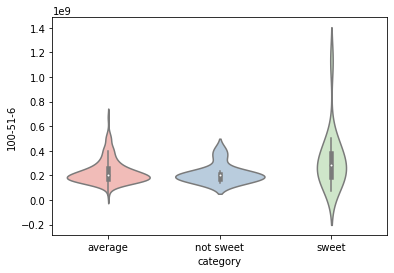

In [48]:
# looking at one specific cas number which was categories as sweet
sns.violinplot(x='category',y= '100-51-6', data=violin_df, palette="Pastel1")
plt.show()

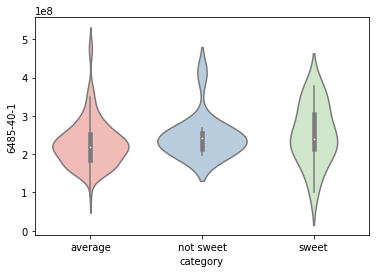

In [49]:
# looking at one specific cas number which was not categories as sweet
sns.violinplot(x='category',y= '6485-40-1' , data=violin_df, palette="Pastel1")
plt.show()

#### 2. one sample which is sweet

In [50]:
CAS_labeled = pd.DataFrame({"intensity": ms_data_comp.loc["000656"]})
CAS_labeled["category"] = list((pd.Series(CAS_labeled.index)).apply((lambda x: 'sweet' if x in sweet_descriptors_CAS else 'not sweet')))

In [51]:
CAS_labeled

,intensity,category
6485-40-1,2.825842e+08,not sweet
3033-23-6,2.133618e+09,sweet
21284-22-0,1.376122e+08,not sweet
38427-78-0,1.129117e+08,not sweet
495-61-4,1.241942e+08,not sweet
...,...,...
713-95-1,1.934397e+08,sweet
20307-84-0,1.241942e+08,not sweet
120021-96-7,1.241942e+08,not sweet
586-62-9,3.090106e+08,not sweet


<AxesSubplot:xlabel='category', ylabel='intensity'>

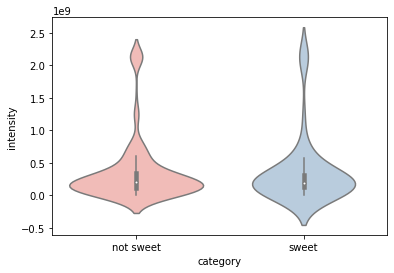

In [52]:
# looking at one sample
sns.violinplot(x='category',y="intensity" , data=CAS_labeled, palette="Pastel1")


expectation: finding new CAS numbers which are corresponding to sweet and repeat the plot

look at all CAS number for one sample labeled sweet

write method :

- normalize over all sample
- intensity should be higher in "sweet" samples for "sweet" CAS numbers compared to "not sweet" samples
- if thats the case we do have a correlation 

#### 3. looking at one sample and all CAS numbers for that sample

In [53]:
# filter for only sweet CAS numbers
only_sweet_CAS_one_sample = CAS_labeled[CAS_labeled["category"]=="sweet"]

<AxesSubplot:ylabel='intensity'>

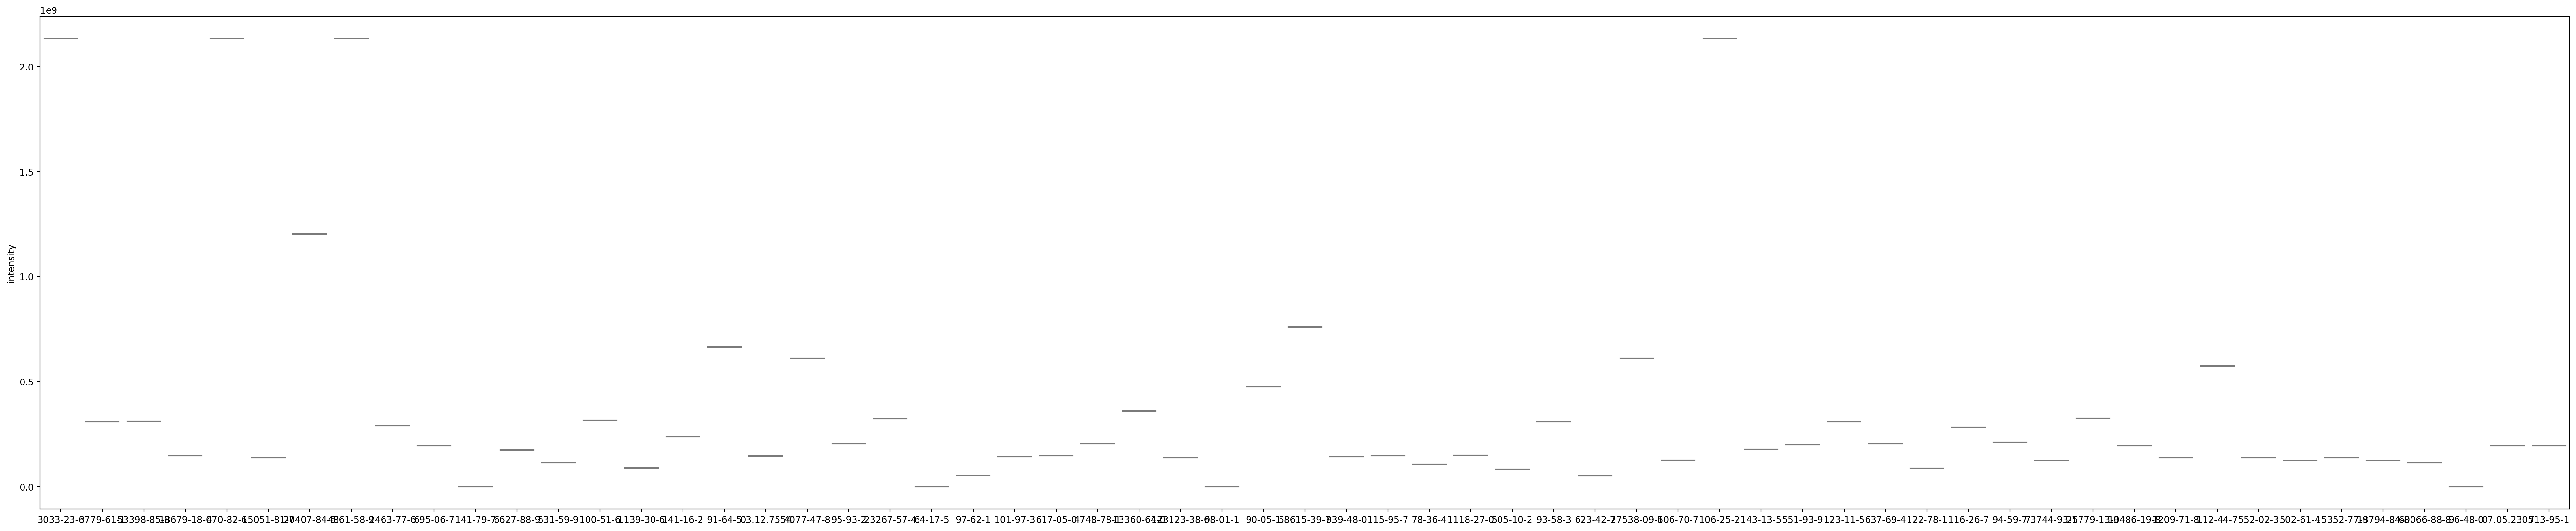

In [54]:
plt.figure(figsize=(50, 10), dpi=200)

sns.violinplot(x=only_sweet_CAS_one_sample.index,y="intensity" , data=only_sweet_CAS_one_sample, palette="Pastel1")


<AxesSubplot:ylabel='intensity'>

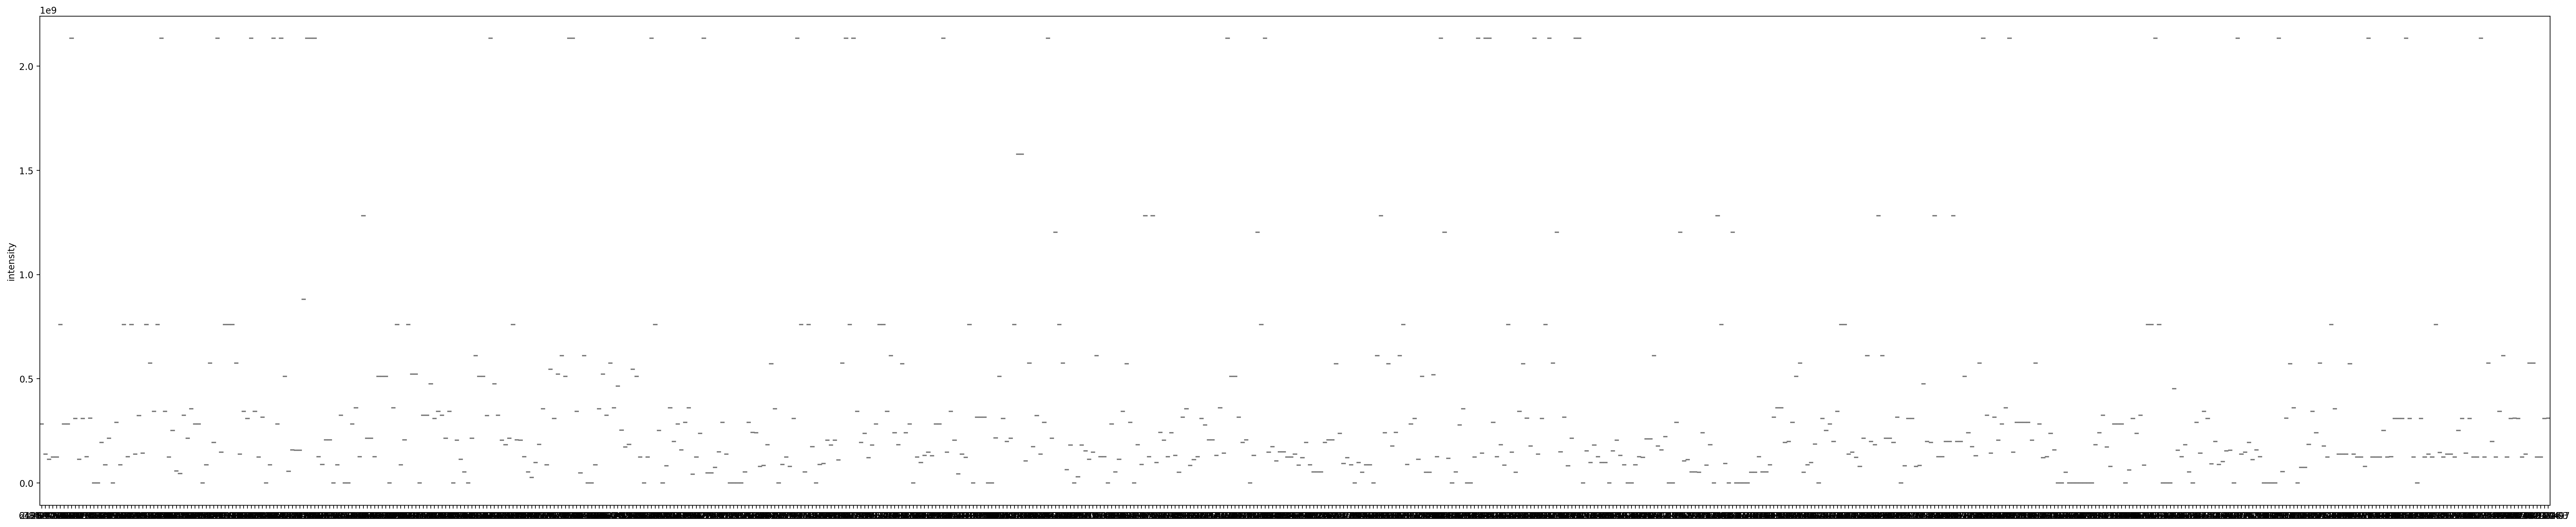

In [55]:
not_sweet_CAS_one_sample = CAS_labeled[CAS_labeled["category"]=="not sweet"]
plt.figure(figsize=(50, 10), dpi=200)

sns.violinplot(x=not_sweet_CAS_one_sample.index,y="intensity" , data=not_sweet_CAS_one_sample, palette="Pastel1")


Looking at all samples considering only sweet CAS numbers

In [56]:
# filter for CAS numbers labeled sweet
sweet_cas_violin_df = pd.DataFrame.copy(violin_df[sweet_descriptors_CAS] )
sweet_cas_violin_df['category'] = pd.DataFrame.copy(violin_df['category'])
#sweet_cas_violin_df = contains all sample and only those CAS numbers which are labeled as sweet
sweet_cas_violin_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,90-05-1,91-64-5,93-58-3,939-48-0,94-59-7,95-93-2,96-48-0,97-62-1,98-01-1,category
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,3.158965e+08,1.422236e+08,1.934397e+08,2.133618e+09,1.251766e+08,1.483225e+08,5.743096e+08,8.858409e+07,1.470269e+08,2.825842e+08,...,4.762459e+08,6.655814e+08,3.090106e+08,1.422236e+08,2.116599e+08,2.050785e+08,0.0,5.292697e+07,0.0,average
000657,2.487103e+08,1.259285e+08,1.719868e+08,2.387300e+09,1.101056e+08,1.120462e+08,5.553109e+08,7.428848e+07,1.310902e+08,2.490753e+08,...,4.380083e+08,3.465025e+08,2.527582e+08,1.259285e+08,1.997221e+08,1.849605e+08,0.0,4.794602e+07,0.0,average
000658,3.199492e+08,2.019822e+08,2.912135e+08,2.208002e+09,1.495594e+08,1.717393e+08,6.027752e+08,1.489214e+08,2.547077e+08,3.063394e+08,...,4.977290e+08,4.154797e+08,3.783629e+08,2.019822e+08,3.143119e+08,2.156091e+08,0.0,7.741295e+07,0.0,average
000838,1.863811e+08,1.753978e+08,2.575301e+08,1.648801e+09,2.154669e+08,5.088073e+08,2.109654e+08,3.268064e+08,3.096287e+08,3.004512e+08,...,1.598261e+08,4.865091e+08,4.299386e+08,1.753978e+08,2.258267e+08,1.024342e+08,0.0,9.969508e+07,0.0,average
000839,1.046439e+08,1.198867e+08,1.556085e+08,1.642697e+09,1.418361e+08,2.048183e+08,1.579338e+08,1.108349e+08,1.252671e+08,2.712269e+08,...,1.044317e+08,4.234640e+08,1.548222e+08,1.198867e+08,2.188339e+08,4.876924e+07,0.0,3.456049e+07,0.0,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.317743e+08,1.197915e+08,2.344530e+08,1.068380e+09,1.249738e+08,9.118521e+07,4.520255e+08,9.181603e+07,1.681713e+08,1.517116e+08,...,3.128464e+08,3.459892e+08,1.823817e+08,1.197915e+08,2.060916e+08,1.388479e+08,0.0,5.133717e+07,0.0,average
000926,2.031930e+08,1.347670e+08,2.029630e+08,1.160679e+09,9.233147e+07,1.001446e+08,4.688051e+08,9.020657e+07,1.925522e+08,2.098708e+08,...,3.920165e+08,3.089746e+08,2.697350e+08,1.347670e+08,2.219231e+08,1.644171e+08,0.0,5.413424e+07,0.0,average
000927,1.497409e+08,1.616757e+08,2.387369e+08,1.102763e+09,1.064605e+08,1.037040e+08,4.690569e+08,1.184667e+08,2.265407e+08,1.688820e+08,...,3.212696e+08,3.116514e+08,2.299686e+08,1.616757e+08,2.358078e+08,1.517470e+08,0.0,5.009739e+07,0.0,average


In [57]:
sweet_cas_violin_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,90-05-1,91-64-5,93-58-3,939-48-0,94-59-7,95-93-2,96-48-0,97-62-1,98-01-1,category
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,3.158965e+08,1.422236e+08,1.934397e+08,2.133618e+09,1.251766e+08,1.483225e+08,5.743096e+08,8.858409e+07,1.470269e+08,2.825842e+08,...,4.762459e+08,6.655814e+08,3.090106e+08,1.422236e+08,2.116599e+08,2.050785e+08,0.0,5.292697e+07,0.0,average
000657,2.487103e+08,1.259285e+08,1.719868e+08,2.387300e+09,1.101056e+08,1.120462e+08,5.553109e+08,7.428848e+07,1.310902e+08,2.490753e+08,...,4.380083e+08,3.465025e+08,2.527582e+08,1.259285e+08,1.997221e+08,1.849605e+08,0.0,4.794602e+07,0.0,average
000658,3.199492e+08,2.019822e+08,2.912135e+08,2.208002e+09,1.495594e+08,1.717393e+08,6.027752e+08,1.489214e+08,2.547077e+08,3.063394e+08,...,4.977290e+08,4.154797e+08,3.783629e+08,2.019822e+08,3.143119e+08,2.156091e+08,0.0,7.741295e+07,0.0,average
000838,1.863811e+08,1.753978e+08,2.575301e+08,1.648801e+09,2.154669e+08,5.088073e+08,2.109654e+08,3.268064e+08,3.096287e+08,3.004512e+08,...,1.598261e+08,4.865091e+08,4.299386e+08,1.753978e+08,2.258267e+08,1.024342e+08,0.0,9.969508e+07,0.0,average
000839,1.046439e+08,1.198867e+08,1.556085e+08,1.642697e+09,1.418361e+08,2.048183e+08,1.579338e+08,1.108349e+08,1.252671e+08,2.712269e+08,...,1.044317e+08,4.234640e+08,1.548222e+08,1.198867e+08,2.188339e+08,4.876924e+07,0.0,3.456049e+07,0.0,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.317743e+08,1.197915e+08,2.344530e+08,1.068380e+09,1.249738e+08,9.118521e+07,4.520255e+08,9.181603e+07,1.681713e+08,1.517116e+08,...,3.128464e+08,3.459892e+08,1.823817e+08,1.197915e+08,2.060916e+08,1.388479e+08,0.0,5.133717e+07,0.0,average
000926,2.031930e+08,1.347670e+08,2.029630e+08,1.160679e+09,9.233147e+07,1.001446e+08,4.688051e+08,9.020657e+07,1.925522e+08,2.098708e+08,...,3.920165e+08,3.089746e+08,2.697350e+08,1.347670e+08,2.219231e+08,1.644171e+08,0.0,5.413424e+07,0.0,average
000927,1.497409e+08,1.616757e+08,2.387369e+08,1.102763e+09,1.064605e+08,1.037040e+08,4.690569e+08,1.184667e+08,2.265407e+08,1.688820e+08,...,3.212696e+08,3.116514e+08,2.299686e+08,1.616757e+08,2.358078e+08,1.517470e+08,0.0,5.009739e+07,0.0,average


In [58]:
sweet_cas_violin_df["sum"]= sweet_cas_violin_df.apply(lambda row:row[0:-1].sum(), axis=1)

In [62]:
sweet_cas_violin_df["mean"]= sweet_cas_violin_df.apply(lambda row:row[0:-2].mean(), axis=1)

In [63]:
sweet_cas_violin_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,93-58-3,939-48-0,94-59-7,95-93-2,96-48-0,97-62-1,98-01-1,category,sum,mean
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,3.158965e+08,1.422236e+08,1.934397e+08,2.133618e+09,1.251766e+08,1.483225e+08,5.743096e+08,8.858409e+07,1.470269e+08,2.825842e+08,...,3.090106e+08,1.422236e+08,2.116599e+08,2.050785e+08,0.0,5.292697e+07,0.0,average,2.185828e+10,3.583325e+08
000657,2.487103e+08,1.259285e+08,1.719868e+08,2.387300e+09,1.101056e+08,1.120462e+08,5.553109e+08,7.428848e+07,1.310902e+08,2.490753e+08,...,2.527582e+08,1.259285e+08,1.997221e+08,1.849605e+08,0.0,4.794602e+07,0.0,average,2.155074e+10,3.532909e+08
000658,3.199492e+08,2.019822e+08,2.912135e+08,2.208002e+09,1.495594e+08,1.717393e+08,6.027752e+08,1.489214e+08,2.547077e+08,3.063394e+08,...,3.783629e+08,2.019822e+08,3.143119e+08,2.156091e+08,0.0,7.741295e+07,0.0,average,2.663776e+10,4.366846e+08
000838,1.863811e+08,1.753978e+08,2.575301e+08,1.648801e+09,2.154669e+08,5.088073e+08,2.109654e+08,3.268064e+08,3.096287e+08,3.004512e+08,...,4.299386e+08,1.753978e+08,2.258267e+08,1.024342e+08,0.0,9.969508e+07,0.0,average,2.285271e+10,3.746347e+08
000839,1.046439e+08,1.198867e+08,1.556085e+08,1.642697e+09,1.418361e+08,2.048183e+08,1.579338e+08,1.108349e+08,1.252671e+08,2.712269e+08,...,1.548222e+08,1.198867e+08,2.188339e+08,4.876924e+07,0.0,3.456049e+07,0.0,average,1.667396e+10,2.733436e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.317743e+08,1.197915e+08,2.344530e+08,1.068380e+09,1.249738e+08,9.118521e+07,4.520255e+08,9.181603e+07,1.681713e+08,1.517116e+08,...,1.823817e+08,1.197915e+08,2.060916e+08,1.388479e+08,0.0,5.133717e+07,0.0,average,1.508288e+10,2.472603e+08
000926,2.031930e+08,1.347670e+08,2.029630e+08,1.160679e+09,9.233147e+07,1.001446e+08,4.688051e+08,9.020657e+07,1.925522e+08,2.098708e+08,...,2.697350e+08,1.347670e+08,2.219231e+08,1.644171e+08,0.0,5.413424e+07,0.0,average,1.655488e+10,2.713914e+08
000927,1.497409e+08,1.616757e+08,2.387369e+08,1.102763e+09,1.064605e+08,1.037040e+08,4.690569e+08,1.184667e+08,2.265407e+08,1.688820e+08,...,2.299686e+08,1.616757e+08,2.358078e+08,1.517470e+08,0.0,5.009739e+07,0.0,average,1.690066e+10,2.770600e+08


<AxesSubplot:xlabel='category', ylabel='sum'>

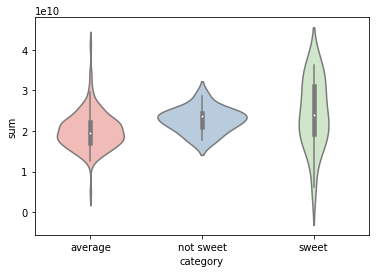

In [64]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category', y='sum', data=sweet_cas_violin_df, palette="Pastel1")


<AxesSubplot:xlabel='category', ylabel='mean'>

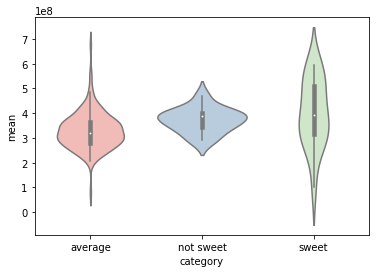

In [65]:
# looking at all cas number which were categories as sweet over all samples
sns.violinplot(x='category', y='mean', data=sweet_cas_violin_df, palette="Pastel1")


#### T - Test
checking difference of intensity for one CAS between different samples

In [126]:
from scipy import stats  

In [ ]:
flavor_true = violin_df[violin_df["category_int"] == 1].index
flavor_false = violin_df[violin_df["category_int"] == -1].index

In [119]:
t_stat, p_val = stats.ttest_ind(violin_df['100-51-6'].loc[flavor_true], violin_df['100-51-6'].loc[flavor_false])  


In [122]:
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = 1.5872619841433904
p-value = 0.12368333223729602


In [123]:
check_CAS(violin_df,'100-51-6','sweet')

1.507998821788822

In [132]:
sweet_cas_violin_df

,100-51-6,101-97-3,10486-19-8,106-25-2,106-70-7,1118-27-0,112-44-7,1139-30-6,115-95-7,116-26-7,...,90-05-1,91-64-5,93-58-3,939-48-0,94-59-7,95-93-2,97-62-1,category,sum,mean
sample_key,,,,,,,,,,,,,,,,,,,,,
000656,3.158965e+08,1.422236e+08,1.934397e+08,2.133618e+09,1.251766e+08,1.483225e+08,5.743096e+08,8.858409e+07,1.470269e+08,2.825842e+08,...,4.762459e+08,6.655814e+08,3.090106e+08,1.422236e+08,2.116599e+08,2.050785e+08,5.292697e+07,average,2.185828e+10,3.583325e+08
000657,2.487103e+08,1.259285e+08,1.719868e+08,2.387300e+09,1.101056e+08,1.120462e+08,5.553109e+08,7.428848e+07,1.310902e+08,2.490753e+08,...,4.380083e+08,3.465025e+08,2.527582e+08,1.259285e+08,1.997221e+08,1.849605e+08,4.794602e+07,average,2.155074e+10,3.532909e+08
000658,3.199492e+08,2.019822e+08,2.912135e+08,2.208002e+09,1.495594e+08,1.717393e+08,6.027752e+08,1.489214e+08,2.547077e+08,3.063394e+08,...,4.977290e+08,4.154797e+08,3.783629e+08,2.019822e+08,3.143119e+08,2.156091e+08,7.741295e+07,average,2.663776e+10,4.366846e+08
000838,1.863811e+08,1.753978e+08,2.575301e+08,1.648801e+09,2.154669e+08,5.088073e+08,2.109654e+08,3.268064e+08,3.096287e+08,3.004512e+08,...,1.598261e+08,4.865091e+08,4.299386e+08,1.753978e+08,2.258267e+08,1.024342e+08,9.969508e+07,average,2.285271e+10,3.746347e+08
000839,1.046439e+08,1.198867e+08,1.556085e+08,1.642697e+09,1.418361e+08,2.048183e+08,1.579338e+08,1.108349e+08,1.252671e+08,2.712269e+08,...,1.044317e+08,4.234640e+08,1.548222e+08,1.198867e+08,2.188339e+08,4.876924e+07,3.456049e+07,average,1.667396e+10,2.733436e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000925,1.317743e+08,1.197915e+08,2.344530e+08,1.068380e+09,1.249738e+08,9.118521e+07,4.520255e+08,9.181603e+07,1.681713e+08,1.517116e+08,...,3.128464e+08,3.459892e+08,1.823817e+08,1.197915e+08,2.060916e+08,1.388479e+08,5.133717e+07,average,1.508288e+10,2.472603e+08
000926,2.031930e+08,1.347670e+08,2.029630e+08,1.160679e+09,9.233147e+07,1.001446e+08,4.688051e+08,9.020657e+07,1.925522e+08,2.098708e+08,...,3.920165e+08,3.089746e+08,2.697350e+08,1.347670e+08,2.219231e+08,1.644171e+08,5.413424e+07,average,1.655488e+10,2.713914e+08
000927,1.497409e+08,1.616757e+08,2.387369e+08,1.102763e+09,1.064605e+08,1.037040e+08,4.690569e+08,1.184667e+08,2.265407e+08,1.688820e+08,...,3.212696e+08,3.116514e+08,2.299686e+08,1.616757e+08,2.358078e+08,1.517470e+08,5.009739e+07,average,1.690066e+10,2.770600e+08


In [131]:
# remove rows with only 0 
sweet_cas_violin_df = sweet_cas_violin_df.loc[:, (sweet_cas_violin_df != 0).any(axis=0)]

In [162]:
#check this for all Cas numbers
alpha = 0.05
labels=[]
p_values = []
significant_CAS =[]
for CAS in sweet_cas_violin_df.iloc[:,:-3].columns:
    t_stat, p_val = stats.ttest_ind(violin_df[CAS].loc[flavor_true], violin_df[CAS].loc[flavor_false])  
    print("CAS: " +str(CAS))
    print("t-statistic = " + str(t_stat))  
    print("p-value = " + str(p_val))
    labels.append(CAS)
    p_values.append(p_val)
    if p_val < alpha:
        significant_CAS.append(CAS)

CAS: 100-51-6
t-statistic = 1.5872619841433904
p-value = 0.12368333223729602
CAS: 101-97-3
t-statistic = 2.321846321376735
p-value = 0.027737363735300658
CAS: 10486-19-8
t-statistic = 2.925996514523596
p-value = 0.006740313261693654
CAS: 106-25-2
t-statistic = -3.1777728641133467
p-value = 0.0036019080506810206
CAS: 106-70-7
t-statistic = 1.855664442248127
p-value = 0.07405637454297812
CAS: 1118-27-0
t-statistic = 2.186885488469252
p-value = 0.03726611789264774
CAS: 112-44-7
t-statistic = -2.5375716268300734
p-value = 0.01701302606505329
CAS: 1139-30-6
t-statistic = 2.6079462757520724
p-value = 0.014445209005922539
CAS: 115-95-7
t-statistic = 2.802337450578015
p-value = 0.00910372688024524
CAS: 116-26-7
t-statistic = 0.2504038006778953
p-value = 0.8041033634952048
CAS: 1209-71-8
t-statistic = 2.931135823623508
p-value = 0.0066559155353733725
CAS: 122-78-1
t-statistic = 1.7076636873711941
p-value = 0.09876535651159045
CAS: 123-11-5
t-statistic = 2.155430115209145
p-value = 0.03987215662


t-statistic = 2.9549756228567214
p-value = 0.006277344670534043
CAS: 2463-77-6
t-statistic = 1.8484935034234897
p-value = 0.07511782535596283
CAS: 25779-13-9
t-statistic = -0.2929965059997704
p-value = 0.7716853303952933
CAS: 27538-09-6
t-statistic = -2.495915901342318
p-value = 0.018725606037273235
CAS: 3033-23-6
t-statistic = -3.1777728641133467
p-value = 0.0036019080506810206
CAS: 3779-61-1
t-statistic = 2.155430115209145
p-value = 0.03987215662778756
CAS: 4077-47-8
t-statistic = -2.495915901342318
p-value = 0.018725606037273235
CAS: 470-82-6
t-statistic = -3.1777728641133467
p-value = 0.0036019080506810206
CAS: 4748-78-1
t-statistic = -1.328794583167011
p-value = 0.19464368792832115
CAS: 4861-58-9
t-statistic = -3.1777728641133467
p-value = 0.0036019080506810206
CAS: 502-61-4
t-statistic = 2.811919058425425
p-value = 0.008895783051184863
CAS: 505-10-2
t-statistic = 0.7863599475936636
p-value = 0.4382615683728127
CAS: 531-59-9
t-statistic = 2.8028036143599153
p-value = 0.0090935050

In [166]:
# 66 % do have a correlation between intensity and label
len(significant_CAS)/len(sweet_cas_violin_df.iloc[:,:-3].columns)

0.6666666666666666

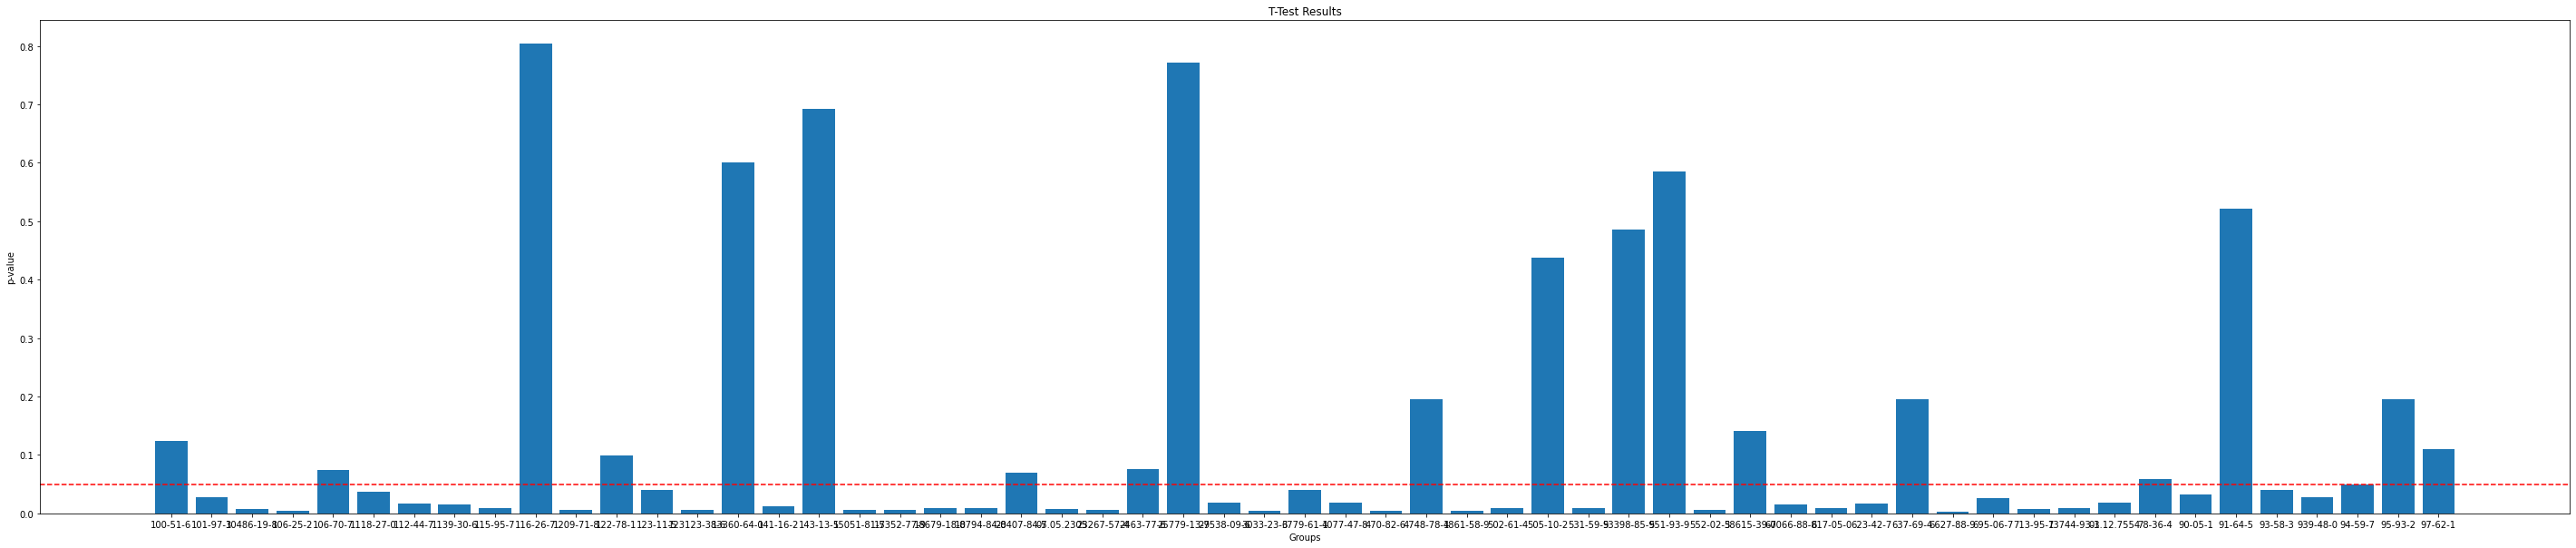

In [167]:
# bar chart of p values
plt.figure(figsize=(50, 10))           
plt.bar(labels, p_values)
plt.axhline(y=alpha, color='r', linestyle='--', label='Threshold')
plt.xlabel('Groups')
plt.ylabel('p-value')
plt.title('T-Test Results')
plt.show()
